---

# Gradient Descent - Regression

---

## Introduction

Gradient descent is a general optimization technique that can be used to minimize any differentiable function. In the context of machine learning, we will use gradient descent to minimize the cost function of a model. 

The gradient descent algorithm is as follows:

1. Initialize the weights and bias of the model to some random values.
2. Calculate the gradient of the cost function with respect to the weights and bias.
3. Update the weights and bias by subtracting the gradient multiplied by a learning rate.
4. Repeat steps 2 and 3 until the cost function is minimized.

Gradient descent is an iterative algorithm that will converge to a local minimum of the cost function. The learning rate is a hyperparameter that controls how much the weights and bias are updated at each iteration. If the learning rate is too large, the algorithm may not converge. If the learning rate is too small, the algorithm may take a long time to converge.


---

## Algorithm

Gradient descent is an optimization algorithm that is commonly used to minimize a cost function by iteratively adjusting the parameters of a model.

#### Mathematical Formulation
The basic idea behind gradient descent is to update the parameters of a model by taking steps in the direction of the negative gradient of the cost function with respect to the parameters. The update rule can be written as:

\begin{equation}
\theta = \theta - \alpha \nabla J(\theta)
\end{equation}

where:

$\theta$ is a vector of parameters to be optimized; 
$\alpha$ is the learning rate, which determines the size of the step taken in each iteration; 
$J(\theta)$ is the cost function to be minimized; 
$\nabla J(\theta)$ is the gradient of the cost function with respect to the parameters $\theta$.

In practice, the gradient is often computed using backpropagation in neural networks. The backpropagation algorithm computes the gradients of the cost function with respect to the weights and biases in each layer of the network, and the gradient descent algorithm updates the weights and biases accordingly.

#### Hyperparameters
The learning rate $\alpha$ is a hyperparameter that determines the size of the step taken in each iteration. If the learning rate is too small, the algorithm may converge very slowly, while if the learning rate is too large, the algorithm may overshoot the minimum of the cost function and fail to converge. Therefore, the learning rate must be carefully tuned to achieve good performance.

#### Example
Consider a simple linear regression model:

$$
y = wx + b
$$

Where:
- $y$ is the predicted value
- $w$ is the weight
- $x$ is the input feature
- $b$ is the bias

Our loss function, the Mean Squared Error (MSE), is defined as:

$$
L(w, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))^2
$$

Where $N$ is the number of training examples, and $(x_i, y_i)$ are the input-output pairs in the training data.

To perform gradient descent, we need to compute the gradients of the loss function with respect to $w$ and $b$. Let's compute the partial derivatives:

$$
\frac{\partial L}{\partial w} = \frac{\partial}{\partial w} \frac{1}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))^2
$$

$$
\frac{\partial L}{\partial b} = \frac{\partial}{\partial b} \frac{1}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))^2
$$

Using the chain rule, we get:

$$
\frac{\partial L}{\partial w} = \frac{-2}{N} \sum_{i=1}^{N} x_i(y_i - (wx_i + b))
$$

$$
\frac{\partial L}{\partial b} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))
$$

Now, we can update the parameters $w$ and $b$ using the computed gradients and the learning rate $\alpha$:

$$
w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}
$$

$$
b_{new} = b_{old} - \alpha \frac{\partial L}{\partial b}
$$

The gradient descent algorithm iteratively updates the parameters $w$ and $b$ using these update rules until convergence or a fixed number of iterations.

---

## Illustration

This is a visualization of gradient descent. The cost function is shown in the background, and the black dot represents the current value of the parameters. The arrow represents the direction of the gradient, and the length of the arrow is proportional to the magnitude of the gradient. The algorithm takes a step in the direction of the negative gradient, and the cost is updated accordingly. The algorithm continues to take steps until the cost function is minimized.

<img src="https://images.deepai.org/glossary-terms/dd6cdd6fcfea4af1a1075aac0b5aa110/sgd.png" alt="SGD" width="400">


---

## Advantages and Disadvantages

#### Pros:
* Gradient descent is a general optimization algorithm that can be used to minimize any differentiable function.
* Gradient descent is a simple algorithm that is easy to implement.
#### Cons:
* Gradient descent may converge to a local minimum of the cost function, and may not find the global minimum.
* Gradient descent may fail to converge if the learning rate is too large.

---

## Implementation - Boston Housing Dataset

I used famous Boston housing dataset to implement gradient descent algorithm. The dataset contains 506 samples and 13 features. The target variable is the median value of owner-occupied homes in $1000s. The features are the crime rate, the proportion of residential land zoned for lots over 25,000 square feet, the proportion of non-retail business acres per town, and so on.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load the dataset
data = fetch_openml(name='Boston', version=1, as_frame=False,parser='auto')

X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to represent the bias term
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

#show the data 
df = pd.DataFrame(X_train, columns=data.feature_names + ['bias'])
df['target'] = y_train
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias,target
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505,1.0,12.0
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474,1.0,19.9
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595,1.0,19.4
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387,1.0,13.4
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787,1.0,18.2


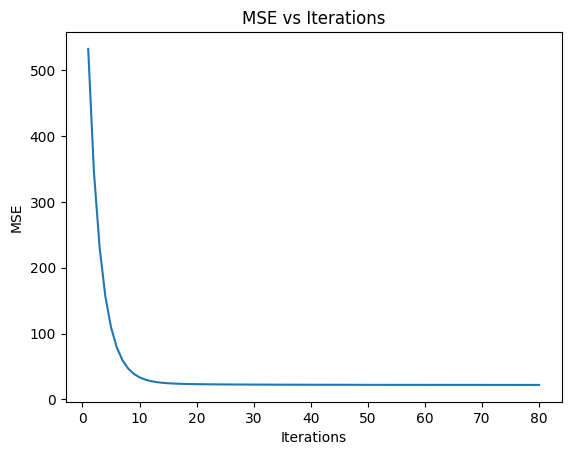

Mean Squared Error: 25.293017233078317
R2 score: 0.655097335183397
Model parameters are [-0.79801109  0.61680882  0.04984798  0.75645509 -1.79329208  3.26574134
 -0.22051115 -2.9231467   0.91759886 -0.52766893 -1.83920653  1.09365355
 -3.5645205  22.79653427]


In [5]:

# Initialize parameters
params = np.random.randn(X_train.shape[1])

# Gradient Descent function
def gradient_descent(X, y, params, alpha, num_iters):
    N = X.shape[0]
    mse_history = []
    
    for i in range(num_iters):
        y_pred = np.dot(X, params)
        residuals = y - y_pred
        gradients = -2 / N * np.dot(X.T, residuals) #based on the derivative of MSE
        params = params - alpha * gradients
        mse = np.mean(residuals ** 2)
        mse_history.append(mse)
    return params, mse_history

# Train the model using gradient descent
alpha = 0.1
num_iters = 80
params, mse_history = gradient_descent(X_train, y_train, params, alpha, num_iters)

# Plot the MSE history
plt.plot(range(1, num_iters + 1), mse_history)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations')
plt.show()

# Make predictions on the test set
y_pred = np.dot(X_test, params)

# Calculate the Mean Squared Error on the test set
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

# Calculate the R2 score on the test set
r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print("R2 score:", r2)

#out put the model parameters
print(f'Model parameters are',params)


---
## Time Series

I used the airline passengers dataset and applied an Autoregressive (AR) model for time series prediction. I created lagged features, split the data into training and testing sets, and optimized the model using gradient descent. 

For simply using a time series model, used one lag feature and split the data into training and testing sets. I used the first 80% of the data for training and the remaining 20% for testing. I used the mean squared error (MSE) to evaluate the model's performance.

After training, I plotted the Mean Squared Error (MSE) against the number of iterations and compared the actual versus predicted values for the test set to assess the model's performance.

---

## Implementation - Airline Passengers Dataset

Mean Squared Error: 2799.620820334166


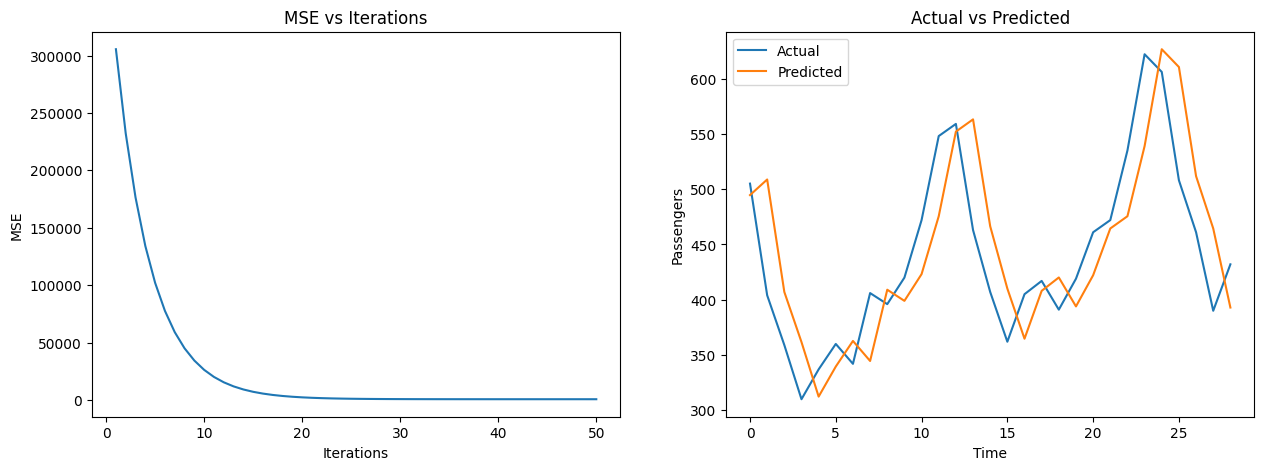

Model parameters are [1.00698017 0.20110986]


In [6]:

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
y = data['Passengers'].values

# Create lagged features
lag = 1
X = np.array([y[i - lag:i] for i in range(lag, len(y))])
y = y[lag:]

# Split the dataset into training and testing sets
train_size = int(0.8 * len(y))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Add a column of ones to represent the bias term
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

# Initialize parameters
params = np.random.randn(X_train.shape[1])

# Gradient Descent function
def gradient_descent(X, y, params, alpha, num_iters):
    N = X.shape[0]
    mse_history = []
    for i in range(num_iters):
        y_pred = np.dot(X, params)
        residuals = y - y_pred
        gradients = -2 / N * np.dot(X.T, residuals)
        params = params - alpha * gradients
        mse = np.mean(residuals ** 2)
        mse_history.append(mse)
    return params, mse_history

# Train the model using gradient descent
alpha = 0.000001
num_iters = 50
params, mse_history = gradient_descent(X_train, y_train, params, alpha, num_iters)

# Make predictions on the test set
y_pred = np.dot(X_test, params)

# Calculate the Mean Squared Error on the test set
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

#plot two graphs in one row
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Plot the MSE history
ax[0].plot(range(1, num_iters + 1), mse_history)
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('MSE')
ax[0].set_title('MSE vs Iterations')


# Plot the actual values and predicted values
ax[1].plot(y_test, label='Actual')
ax[1].plot(y_pred, label='Predicted')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Passengers')
ax[1].set_title('Actual vs Predicted')
ax[1].legend()
plt.show()

#out put the model parameters
print(f'Model parameters are',params)
